In [114]:
import torch
import torch.nn as nn
from torchviz import make_dot



In [121]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

c = a * x
y_hat = c + b
z = y_hat - y
L = z**2

make_dot(L)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [28]:
L.backward()

In [29]:
a.grad
b.grad

tensor([-10.])

In [30]:
class MySquare(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input**2
    
    @staticmethod
    def backward(ctx, grad_output):
        input,  = ctx.saved_tensors
        return 2 * input * grad_output

my_square = MySquare.apply


x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = my_square(z)
L.backward()

In [31]:
a.grad

tensor([-30.])

In [32]:
import pandas as pd

In [149]:
data = pd.read_csv("data_linear.csv").values
X = torch.tensor(data[:, 0], dtype=torch.float64) / 10
y = torch.tensor(data[:, 1], dtype=torch.float64) /500

class LinearRegression:
    def __init__(self, learning_rate = .01, max_iterations = 1000):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        
        self.a = None
        self.b = None
        
    def model(self, x):
        return self.a * x + self.b
    
    def error(self, y_hat, y):
        squared_diffs = (y_hat - y)**2
        return squared_diffs.mean()

    
    def fit(self, x, y):
        self.a = torch.tensor(0.5, requires_grad = True, dtype=torch.float64)
        self.b = torch.tensor(0.5, requires_grad = True, dtype=torch.float64)
        
        for ite in range(1, self.max_iterations + 1):
        # nếu có grad ở tham số a, b thì zero đi, tránh trường hợp cộng dồn grad
            if self.a.grad is not None:
                self.a.grad.zero_()
            if self.b.grad is not None:
                self.b.grad.zero_()
        
            # xây model, loss
            y_hat = self.model(x)
            loss = self.error(y_hat, y)

            # gọi backward để tính đạo hàm ngược của loss với tham số a, b
            loss.backward()

            # update a,b bằng thuật toán gradient descent, để torch.no_grad thì mình không cần backward ở bước này
            with torch.no_grad():
                self.a -= self.lr * self.a.grad
                self.b -= self.lr * self.b.grad
            print(f"Epoch {ite}, loss metrics {loss}")       
            
    def predict(self, X):
        return self.a * X + self.b

In [150]:
lm = LinearRegression()
lm.a

In [151]:
lm.fit(X, y)


Epoch 1, loss metrics 3.3605401400941997
Epoch 2, loss metrics 0.030447082039855133
Epoch 3, loss metrics 0.022197049655934616
Epoch 4, loss metrics 0.02209921413266073
Epoch 5, loss metrics 0.022021669165024224
Epoch 6, loss metrics 0.021944457744633942
Epoch 7, loss metrics 0.021867529854801625
Epoch 8, loss metrics 0.02179088433506812
Epoch 9, loss metrics 0.021714520148678237
Epoch 10, loss metrics 0.021638436262975298
Epoch 11, loss metrics 0.021562631649093816
Epoch 12, loss metrics 0.021487105281944908
Epoch 13, loss metrics 0.02141185614020222
Epoch 14, loss metrics 0.021336883206288362
Epoch 15, loss metrics 0.02126218546636101
Epoch 16, loss metrics 0.021187761910299235
Epoch 17, loss metrics 0.021113611531689825
Epoch 18, loss metrics 0.021039733327813684
Epoch 19, loss metrics 0.020966126299632248
Epoch 20, loss metrics 0.02089278945177409
Epoch 21, loss metrics 0.020819721792521277
Epoch 22, loss metrics 0.020746922333796113
Epoch 23, loss metrics 0.020674390091147694
Epoc

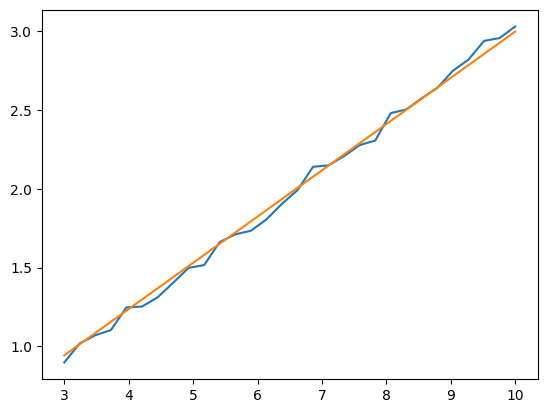

In [152]:
import matplotlib.pyplot as plt

plt.plot(X, y)
plt.plot(X, lm.predict(X).detach().numpy())

In [111]:
lm.a

tensor(0.6658, dtype=torch.float64, requires_grad=True)

In [112]:
X

tensor([0.6000, 0.6483, 0.6966, 0.7448, 0.7931, 0.8414, 0.8897, 0.9379, 0.9862,
        1.0345, 1.0828, 1.1310, 1.1793, 1.2276, 1.2759, 1.3241, 1.3724, 1.4207,
        1.4690, 1.5172, 1.5655, 1.6138, 1.6621, 1.7103, 1.7586, 1.8069, 1.8552,
        1.9034, 1.9517, 2.0000], dtype=torch.float64)

In [125]:
a = torch.tensor(3.0)
b = torch.tensor(3.0)
a.requires_grad = True
print(a.is_leaf)
print(b.is_leaf)

c = a * b
print(c.is_leaf)

True
True
False


In [134]:
n, input_dim, hidden_dim, output_dim = 64, 784, 100, 10

# Create random input and output data
x = torch.randn(n, input_dim)
y = torch.randn(n, output_dim)

# Randomly initialize weights
w1 = torch.randn(input_dim, hidden_dim)
w2 = torch.randn(hidden_dim, output_dim)
learning_rate = 1e-6

for t in range(500):
    # Forward pass: compute predicted y
    h = x @ w1
    h_relu = h.clamp(min=0)
    y_pred = h_relu @ w2

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

        
        
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


99 1737.90234375
199 37.529075622558594
299 1.5820496082305908
399 0.0880310907959938
499 0.0060176001861691475


In [132]:
x, y

(tensor([[-0.1415,  0.3617, -1.5502,  ...,  0.2441, -0.1792, -0.0707],
         [ 0.7776,  1.5002, -0.3116,  ...,  1.3174, -0.4838,  0.0572],
         [-0.2551,  0.4376,  0.3212,  ...,  0.9126,  0.4178, -0.6002],
         ...,
         [-0.9394, -0.1692, -0.1052,  ...,  0.7911,  1.2300,  0.4635],
         [ 1.8118,  0.2694,  0.0475,  ...,  0.7771,  1.3587, -1.0109],
         [-1.4929,  0.5852,  0.6510,  ...,  1.0493,  0.9050,  2.4599]]),
 tensor([[-7.6154e-01, -9.6260e-04,  7.2759e-02, -1.2996e+00,  7.2385e-01,
           1.4477e+00,  4.4407e-01, -1.3210e-01,  1.2482e-01, -1.0593e-01],
         [ 3.8737e-01,  5.6627e-01, -8.4857e-01, -8.6267e-01, -2.3556e+00,
           1.2945e+00, -1.8677e+00, -3.0032e-01, -1.6406e+00, -8.1563e-01],
         [ 2.5713e-01, -2.4955e-01, -1.1174e+00,  1.6269e+00,  2.7387e-01,
          -3.0364e-01,  7.4902e-01, -9.6764e-01,  1.1022e+00,  1.0981e+00],
         [ 4.1538e-01,  8.5702e-01, -6.1458e-01,  1.4468e-01, -2.1006e-01,
           6.3491e-01, -3.2266

In [136]:
n, input_dim, hidden_dim, output_dim = 64, 784, 100, 10

# Create random input and output data
x = torch.randn(n, input_dim)
y = torch.randn(n, output_dim)

# Randomly initialize weights
w1 = torch.randn(input_dim, hidden_dim, requires_grad = True)
w2 = torch.randn(hidden_dim, output_dim, requires_grad = True)
learning_rate = 1e-6

for t in range(500):
    # Forward pass: compute predicted y
    h = x @ w1
    h_relu = h.clamp(min=0)
    y_pred = h_relu @ w2

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()
        
        
    # Backprop to compute gradients of w1 and w2 with respect to loss
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()
    # Update weights using gradient descent
    


99 1419.779296875
199 15.0370454788208
299 0.2749688923358917
399 0.006338414270430803
499 0.00034584992681629956


In [ ]:
n_samples, d_in, d_hidden, d_out = 64, 1000, 100, 10

x = torch.tensor(